In [1]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from spoint.utils.primitives import Primitives
from spoint.utils.homography import Homography
from spoint.utils.config import Config

def draw_image(image):
    plt.imshow(image, cmap='gray')
    plt.show()

## Render primiteve

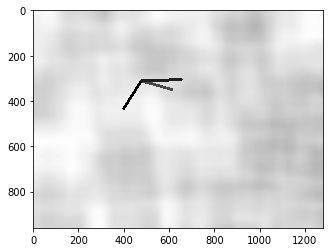

In [3]:
image, points = Primitives(['lines', 'polygon', 'ellipses', 'star', 'stripes', 'cube', 'checkerboard'])()
draw_image(image)

## Test perspective

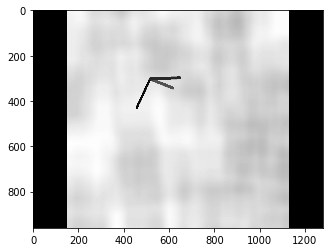

In [12]:
config = Config({
    'patch': {'ratio': 0.9},
    'perspective': {'prob': 1.0, 'dx': 0.5, 'dy': 0.5, 'artifacts': True},
})

warp_image, warp_points = Homography(config)(image, points)
draw_image(warp_image)

## Test rotation

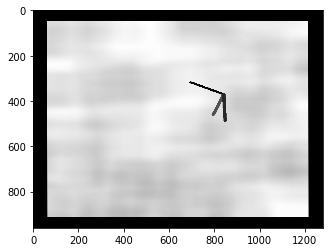

In [14]:
config = Config({
    'patch': {'ratio': 0.9},
    'rotation': {'prob': 1.0, 'max_angle': 1.57, 'num_angles': 10, 'artifacts': True}
})

warp_image, warp_points = Homography(config)(image, points)
draw_image(warp_image)

## Test random homography

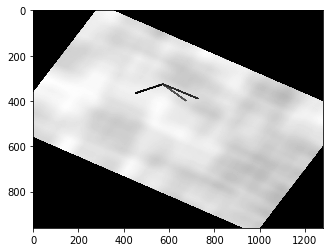

In [20]:
config = Config({
    'patch': {'ratio': 0.9},
    'rotation': {'prob': 0.5, 'max_angle': 1.57, 'num_angles': 10, 'artifacts': True},
    'perspective': {'prob': 0.5, 'dx': 0.5, 'dy': 0.5, 'artifacts': True},
})

warp_image, warp_points = Homography(config)(image, points)
draw_image(warp_image)